In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

In [111]:
df = pd.read_csv('oasis_longitudinal.csv')
crossDF = pd.read_csv('oasis_cross-sectional.csv')
ndf = pd.read_csv('oasis_longitudinal_int.csv')

In [99]:
crossDF.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [100]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [11]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


AxesSubplot(0.125,0.125;0.775x0.755)


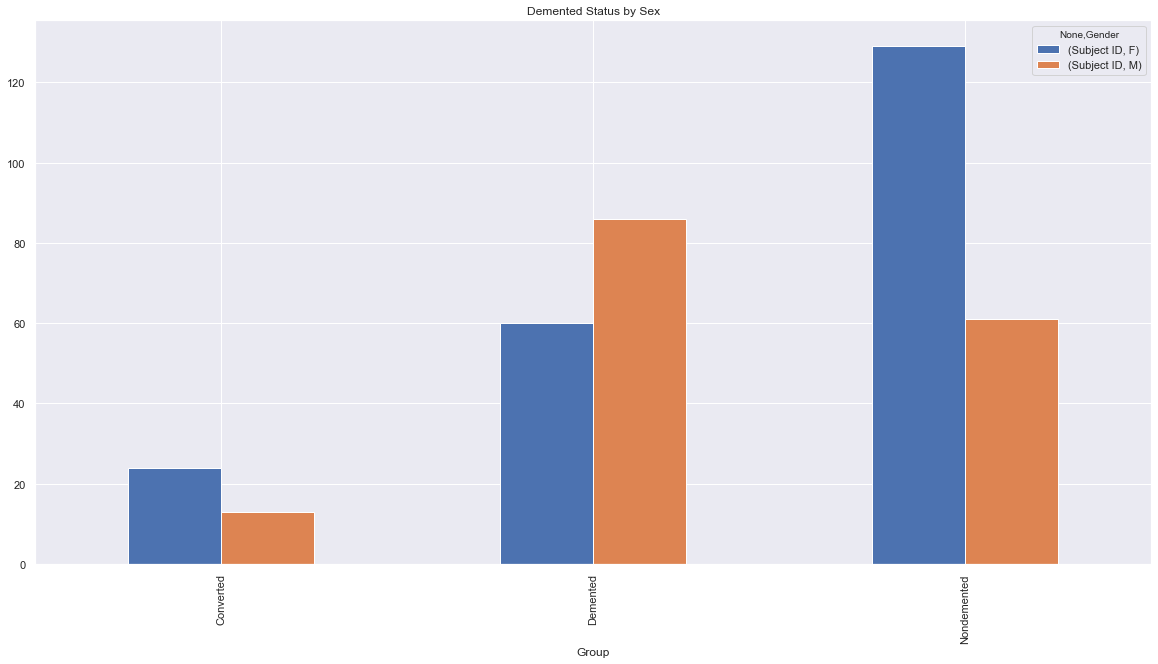

In [195]:
GendTitle = "Demented Status by Sex"
pivot = df.pivot_table(index=['Group'], columns=['Gender'], values=['Subject ID'], aggfunc='count')
print(pivot.plot.bar(title=GendTitle, figsize=(20,10)))

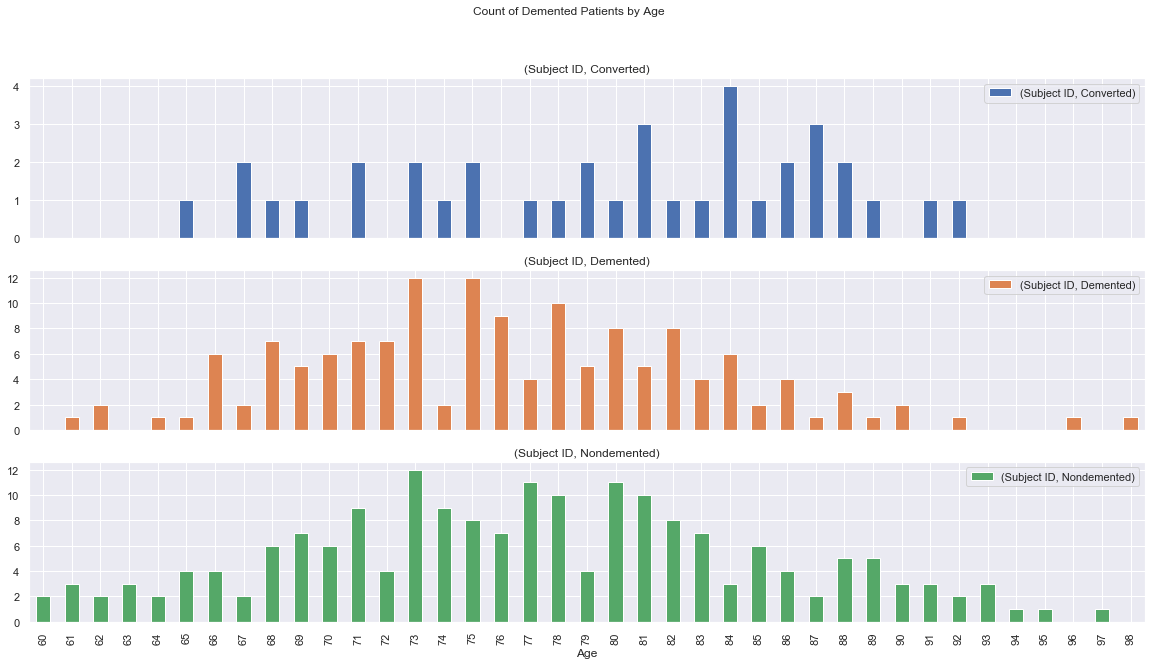

In [197]:
AgeTitle = "Count of Demented Patients by Age"
pivot = df.pivot_table(index=['Age'], columns=['Group'], values=['Subject ID'], aggfunc='count')
print(pivot.plot.bar(figsize=(20,10), subplots='True', title=AgeTitle))

AxesSubplot(0.125,0.125;0.62x0.755)


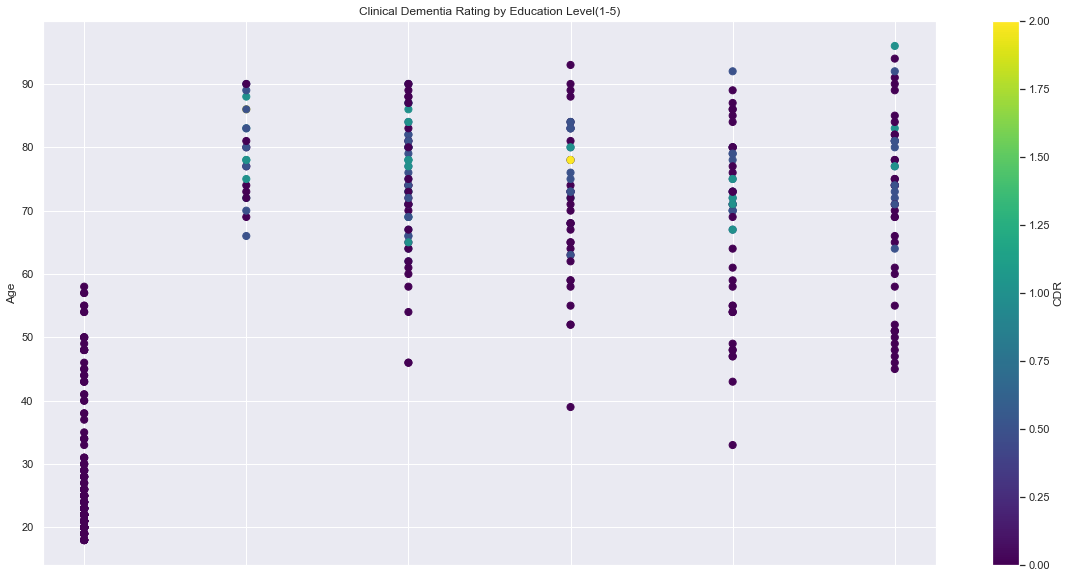

In [192]:
#Clinical Dementia Rating by Education Level
EduTitle = "Clinical Dementia Rating by Education Level(1-5)"
pivot = crossDF.pivot_table(index=['ID'], values=['Educ', 'CDR', 'Age'], aggfunc='sum')
print(pivot.plot.scatter(x='Educ', y='Age', c='CDR', colormap='viridis', figsize=(20,10), s=50, title=EduTitle))

AxesSubplot(0.125,0.125;0.62x0.755)


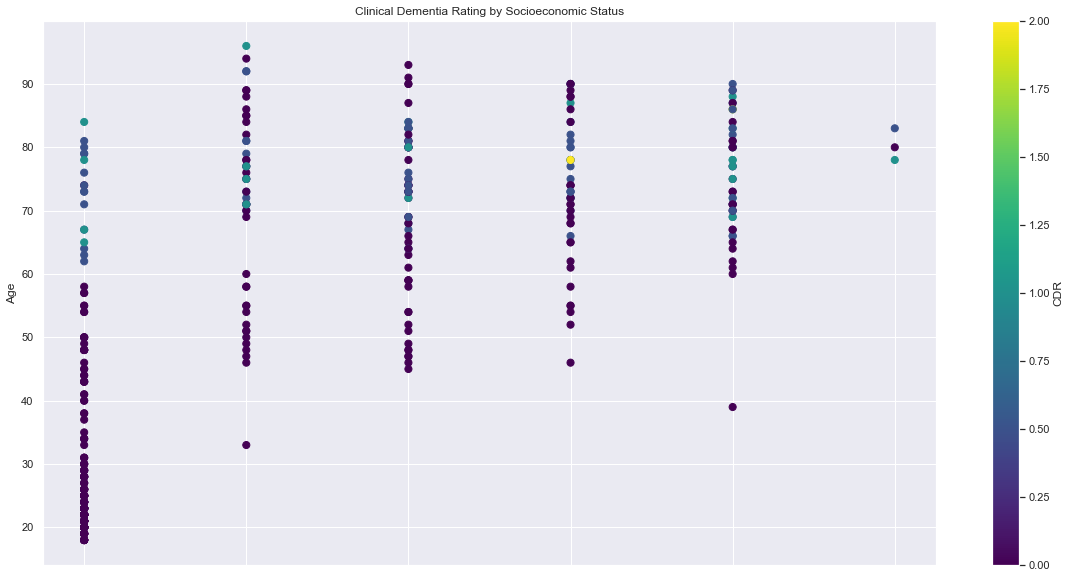

In [193]:
#Clinical Dementia Rating by Socioeconomic Level
SocioTitle = "Clinical Dementia Rating by Socioeconomic Status"
pivot = crossDF.pivot_table(index=['ID'], values=['SES', 'CDR', 'Age'], aggfunc='sum')
print(pivot.plot.scatter(x='SES', y='Age', c='CDR', colormap='viridis', figsize=(20,10), s=50, title=SocioTitle))